# Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

# Create dataset

In [2]:
raw_dataset = pd.read_csv('Trainingdata.csv', sep=',', skipinitialspace=True)
dataset = raw_dataset.copy()
pd.set_option('display.max_columns', None)

In [3]:
dataset = dataset.rename(columns={dataset.columns[-1]:'testVal'})

In [200]:
#Viz
dataset.isna().sum()

0          0
0.1        0
0.2        0
0.3        0
0.4        0
0.6        0
0.7        0
0.8        0
0.9        0
0.10       0
0.11       0
0.12       0
0.13       0
0.14       0
0.15       0
0.16       0
0.17       0
0.18       0
0.19       0
0.20       0
0.21       0
0.22       0
0.23       0
0.24       0
0.25       0
0.26       0
0.27       0
0.28       0
0.29       0
0.30       0
0.31       0
0.32       0
0.33       0
0.34       0
0.35       0
0.36       0
0.37       0
0.38       0
0.39       0
0.40       0
0.41       0
0.42       0
0.43       0
-1         0
-1.1       0
-1.2       0
-1.3       0
-1.4       0
44         0
4          0
0.44       0
0.5        0
4.1        0
-1.5       0
40         0
1          0
testVal    0
dtype: int64

In [5]:
dataset = dataset.dropna()

In [4]:
#Viz
dataset.tail()

,0,0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,-1,-1.1,-1.2,-1.3,-1.4,44,4,1,0.44,0.45,0.46,0.5,0.47,0.48,0.49,0.50,1.1,0.51,0.52,-1.5,39,1.2,testVal
8868,0,16,13,9,10,10,13,8,9,9,9,11,10,11,9,10,14,14,12,12,9,9,11,11,7,11,7,11,1,12,-20,-5,-3,12,-53,12,-46,16,-16,22,48,21,48,-1,-1,-1,-1,-1,27,70,1,0,0,0,0.817078,0,0,0,0,1,0,0,-1,26,3,0.841548
8869,0,16,13,9,10,10,13,8,9,9,9,11,10,11,9,10,14,14,12,12,9,9,11,11,7,11,7,14,1,12,-20,-5,-3,12,-53,12,-46,16,-16,22,48,21,48,-1,-1,-1,-1,-1,27,70,0,1,0,0,0.817532,0,0,0,0,0,0,1,0,31,3,0.841548
8870,0,16,13,9,10,10,13,8,9,9,9,11,10,11,9,10,14,14,12,12,9,9,11,11,7,11,7,14,1,12,-20,-5,-1,12,-53,12,-46,16,-16,22,48,21,48,-1,-1,-1,-1,-1,27,70,0,1,0,0,0.818228,0,0,0,0,0,0,1,0,31,1,0.841548
8871,0,16,13,9,10,10,13,8,9,9,9,11,10,11,9,10,14,14,12,12,9,9,11,11,7,11,7,14,1,12,-20,-5,0,12,-53,12,-46,16,-16,22,48,21,48,-1,-1,-1,-1,-1,27,70,0,0,1,0,0.831238,0,0,0,1,0,0,0,0,31,1,0.841548
8872,0,15,13,9,10,10,13,8,9,9,9,11,10,11,9,10,14,14,12,12,9,9,11,11,7,11,7,14,1,12,-20,-5,1,12,-53,12,-46,16,-16,22,48,21,48,-1,-1,-1,-1,-1,27,70,0,1,0,0,0.831207,1,0,0,0,0,0,0,-1,-1,-1,0.841548


In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('testVal')
test_labels = test_features.pop('testVal')

In [7]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,290.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
0.1,290.0,-0.386207,1.174623,-2.000000,-1.0,-1.000000,1.000000,1.000000
0.2,290.0,0.744828,1.034219,-1.000000,0.0,1.000000,1.000000,3.000000
0.3,290.0,0.148276,1.804094,-5.000000,-1.0,0.000000,1.000000,9.000000
0.4,290.0,-0.127586,1.593976,-3.000000,-1.0,-1.000000,1.000000,8.000000
0.6,290.0,-1.055172,0.502992,-4.000000,-1.0,-1.000000,-1.000000,0.000000
0.7,290.0,-0.600000,1.301583,-3.000000,-2.0,-1.000000,1.000000,2.000000
0.8,290.0,-1.006897,1.112972,-4.000000,-2.0,-1.000000,-1.000000,3.000000
0.9,290.0,-0.368966,1.712483,-3.000000,-2.0,0.000000,1.000000,3.000000
0.10,290.0,0.048276,1.317075,-3.000000,-1.0,0.000000,1.000000,3.000000


# Normalization

In [7]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [167]:
print(normalizer.mean.numpy())

[[ 0.0000000e+00 -3.8620690e-01  7.4482757e-01  1.4827587e-01
  -1.2758620e-01 -1.0551724e+00 -6.0000002e-01 -1.0068966e+00
  -3.6896554e-01  4.8275862e-02  2.0689654e+00  3.0103450e+00
   3.1448276e+00  2.5827584e+00  3.3793104e-01 -3.1034481e-02
   3.7241381e-01  8.9655173e-01 -3.6206895e-01 -4.7241381e-01
   1.1724137e+00 -2.9655173e-01 -4.4137931e-01  6.1379313e-01
  -1.6206896e-01  1.0586207e+00 -6.7931038e-01 -1.7586207e-01
  -1.3620689e+00 -6.4137936e-01  2.0689654e-01 -1.0034482e+00
  -3.7586209e-01  1.6551724e-01 -9.8620695e-01  1.0068966e+00
  -2.8275862e-01 -4.6896556e-01 -1.0724138e+00  1.3896552e+00
   2.3103449e+00  1.0827585e+00  1.1482759e+00 -1.0000000e+00
  -1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
   4.2299999e+01  4.0000000e+00  6.2413788e-01  5.8596635e-01
   8.4413795e+00  1.3617242e+01  1.5896552e+00  1.3793102e-02
   1.3103448e-01  5.4137927e-01  1.7241379e-02  2.9655176e-01]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# Linear Regression

In [8]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [9]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 74ms/step


array([[-0.13239077],
       [ 1.5114526 ],
       [ 0.4887989 ],
       [ 1.227671  ],
       [-0.5342397 ],
       [-0.59074736],
       [ 0.07944753],
       [ 1.0066601 ],
       [ 0.44309202],
       [-1.3325415 ]], dtype=float32)

In [10]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(65, 1) dtype=float32, numpy=
array([[-0.16479614],
       [-0.18584204],
       [ 0.17210305],
       [ 0.07251981],
       [-0.282098  ],
       [ 0.17026451],
       [ 0.19518223],
       [ 0.02784142],
       [-0.2202789 ],
       [-0.28409418],
       [-0.1358776 ],
       [-0.20928985],
       [-0.04382697],
       [ 0.08444387],
       [ 0.28072935],
       [ 0.2541737 ],
       [ 0.18931714],
       [-0.21859735],
       [-0.03636074],
       [ 0.2258851 ],
       [-0.14081752],
       [ 0.28928393],
       [ 0.20873535],
       [ 0.28305095],
       [ 0.03377193],
       [-0.05631657],
       [-0.1704995 ],
       [ 0.13312271],
       [-0.02234221],
       [-0.12153865],
       [ 0.05791065],
       [-0.2674414 ],
       [ 0.2807294 ],
       [-0.12202683],
       [ 0.21918285],
       [ 0.05712384],
       [-0.06301713],
       [ 0.21663547],
       [-0.24643531],
       [ 0.03888386],
       [ 0.00321001],
       [-0.21219613],
       [-0

In [11]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [12]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


CPU times: total: 28.1 s
Wall time: 22.3 s


In [13]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# Neural Network

In [14]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(512, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [15]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 65)               131       
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 512)               33792     
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 297,092
Trainable params: 296,961
Non-trainable params: 131
_________________________________________________________________


In [16]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    epochs=100)

Epoch 1/100


c:\Users\Daniel\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


178/178 [==============================] - 2s 7ms/step - loss: 0.1228 - val_loss: 0.0727
Epoch 2/100
178/178 [==============================] - 1s 6ms/step - loss: 0.0678 - val_loss: 0.0613
Epoch 3/100
178/178 [==============================] - 1s 5ms/step - loss: 0.0591 - val_loss: 0.0549
Epoch 4/100
178/178 [==============================] - 1s 5ms/step - loss: 0.0502 - val_loss: 0.0486
Epoch 5/100
178/178 [==============================] - 1s 5ms/step - loss: 0.0456 - val_loss: 0.0477
Epoch 6/100
178/178 [==============================] - 1s 5ms/step - loss: 0.0433 - val_loss: 0.0420
Epoch 7/100
178/178 [==============================] - 1s 5ms/step - loss: 0.0395 - val_loss: 0.0396
Epoch 8/100
178/178 [==============================] - 1s 5ms/step - loss: 0.0381 - val_loss: 0.0372
Epoch 9/100
178/178 [==============================] - 1s 6ms/step - loss: 0.0358 - val_loss: 0.0402
Epoch 10/100
178/178 [==============================] - 1s 5ms/step - loss: 0.0359 - val_loss: 0.0416
E

In [17]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [18]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,0.412108
dnn_model,0.017952


In [19]:
test_predictions = dnn_model.predict(test_features).flatten()

56/56 [==============================] - 0s 2ms/step


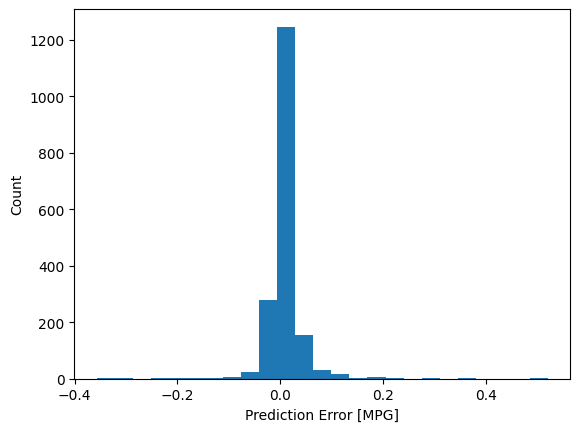

In [20]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [21]:
dnn_model.save('dnn_model3')

INFO:tensorflow:Assets written to: dnn_model3\assets


INFO:tensorflow:Assets written to: dnn_model3\assets


In [ ]:
reloaded = tf.keras.models.load_model('dnn_model3')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [23]:
data = [0, -2, 1, -2, 1, -2, -2, 1, 1, 3, 2, 6, 1, 3, -2, -3, -3, 2, -2, -1, 2, 2, -2, -3, 1, -3, -2, 3, -2, -3, -3, -1, -1, 3, 2, -2, 1, -3, -2, 1, 8, 1, 1, -1, -1, -1, -1, -1, 44, 4, 0, 0.3341376050825775, 4, -1, 16, 1]
    #data[i] = str(data[i])
dnn_model.predict(np.array( [data,] ))


1/1 [==============================] - 0s 75ms/step


array([[0.35849035]], dtype=float32)

In [195]:
np.array(data)

2.0

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]